In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load dataset
data = pd.read_csv('room_prices_dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Room Type           1000 non-null   object 
 1   Sea Facing          680 non-null    object 
 2   Jacuzzi             1000 non-null   object 
 3   Balcony             1000 non-null   object 
 4   Bed Type            1000 non-null   object 
 5   In-Room Technology  1000 non-null   object 
 6   Season              1000 non-null   object 
 7   Floor Level         1000 non-null   int64  
 8   Price               1000 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 70.4+ KB


In [10]:
# Replace 'None' with 'No View' in the 'Sea Facing' column
data['Sea Facing'] = data['Sea Facing'].fillna('No View')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Room Type           1000 non-null   object 
 1   Sea Facing          1000 non-null   object 
 2   Jacuzzi             1000 non-null   object 
 3   Balcony             1000 non-null   object 
 4   Bed Type            1000 non-null   object 
 5   In-Room Technology  1000 non-null   object 
 6   Season              1000 non-null   object 
 7   Floor Level         1000 non-null   int64  
 8   Price               1000 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 70.4+ KB


In [12]:
# Convert categorical variables to category dtype
data['Room Type'] = data['Room Type'].astype('category')
data['Sea Facing'] = data['Sea Facing'].astype('category')
data['Jacuzzi'] = data['Jacuzzi'].astype('category')
data['Balcony'] = data['Balcony'].astype('category')
data['Bed Type'] = data['Bed Type'].astype('category')
data['In-Room Technology'] = data['In-Room Technology'].astype('category')
data['Season'] = data['Season'].astype('category')


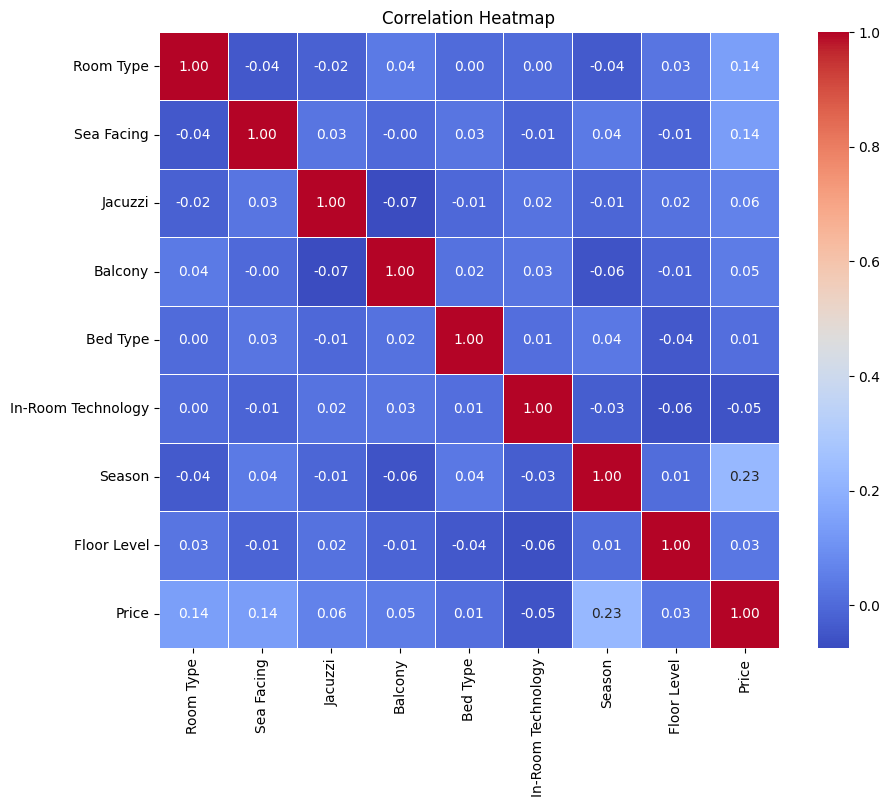

In [15]:
# Convert categorical variables to numerical codes
df_encoded = data.copy()
for col in df_encoded.select_dtypes(include=['category']).columns:
    df_encoded[col] = df_encoded[col].cat.codes

# Compute correlation matrix
corr = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


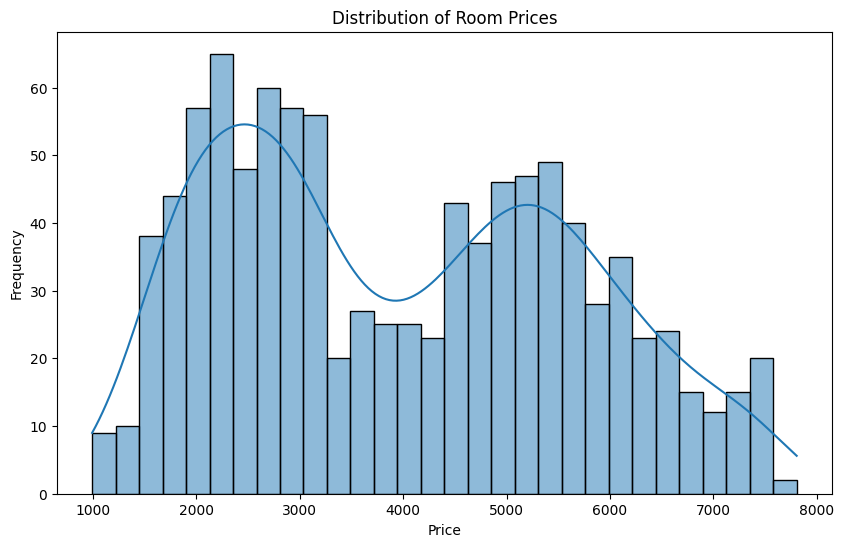

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Distribution of Room Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


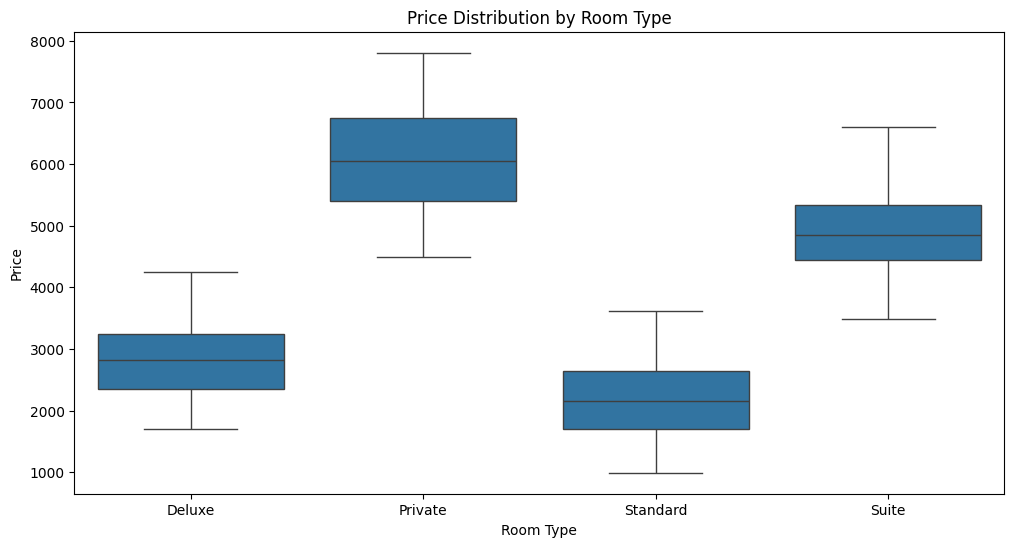

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Room Type', y='Price', data=data)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()


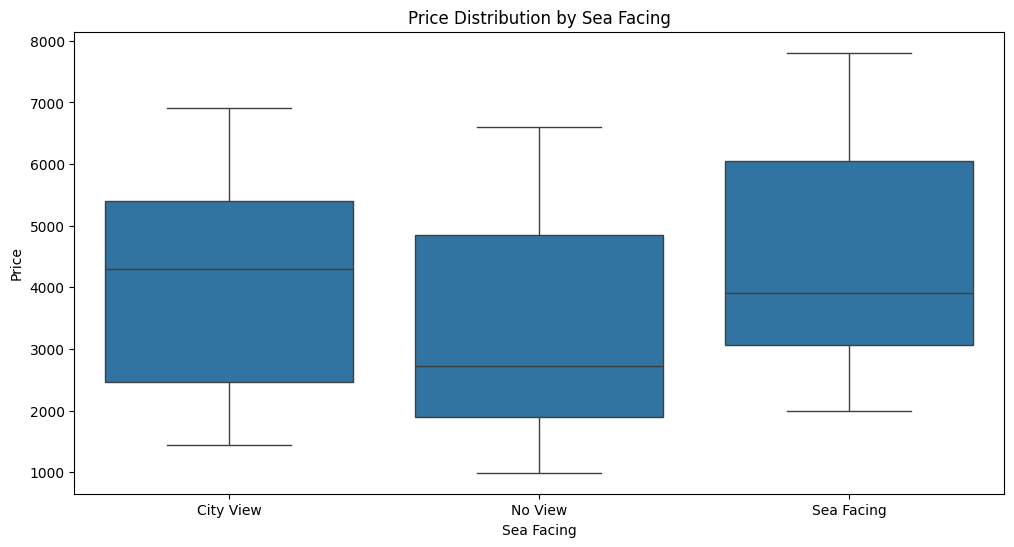

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sea Facing', y='Price', data=data)
plt.title('Price Distribution by Sea Facing')
plt.xlabel('Sea Facing')
plt.ylabel('Price')
plt.show()


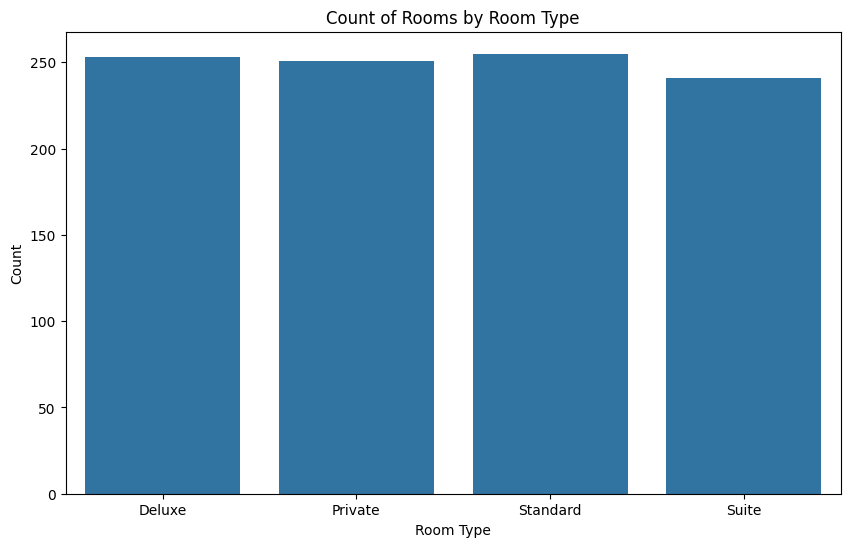

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Room Type', data=data)
plt.title('Count of Rooms by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

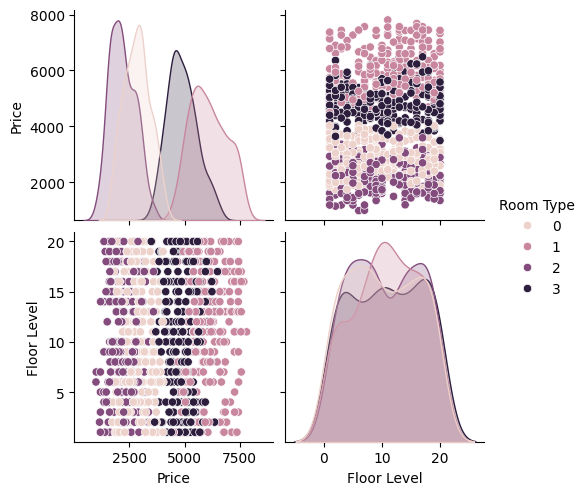

In [24]:
# Convert categorical variables to numerical codes for pairplot
df_encoded = data.copy()
for col in df_encoded.select_dtypes(include=['category']).columns:
    df_encoded[col] = df_encoded[col].cat.codes

# Pair plot
sns.pairplot(df_encoded, hue='Room Type', vars=['Price', 'Floor Level'])
plt.show()
